In [2]:
!wget "https://github.com/valerio-unifei/UNIFEI-IA-Aulas/raw/main/benchmark-datasets.zip" -O datasets.zip
!unzip datasets.zip
!rm datasets.zip

--2021-07-04 21:20:25--  https://github.com/valerio-unifei/UNIFEI-IA-Aulas/raw/main/benchmark-datasets.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valerio-unifei/UNIFEI-IA-Aulas/main/benchmark-datasets.zip [following]
--2021-07-04 21:20:25--  https://raw.githubusercontent.com/valerio-unifei/UNIFEI-IA-Aulas/main/benchmark-datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232196 (1.2M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]   1.17M  --.-KB/s    in 0.02s   

2021-07-04 21:20:26 (47.1 MB/s) - ‘datasets.zip’ saved [1232196/12321

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

##Sorteio
Matrícula: 2017006999 </br>
Dataset: letter </br>
Aprendizado 1: ExtraTreeClassifier </br>
Aprendizado 2: BaggingClassifier </br>

##Comparativo (média) 
Aprendizado 1: 0.750 </br>
Aprendizado 2: 0.917 </br>


In [5]:
df = pd.read_csv('letter.csv')
df.head()

,X-box,Y-box,Width,High,Onpix,X-bar,Y-bar,X2bar,Y2bar,Xybar,X2ybr,Xy2br,X-ege,Xegvy,Y-ege,Yegvx,Class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H


## Sobre a base de dados
Esse dataset foi produzido com 20.000 estímulos únicos, obtidos a partir de imagens de letras escritas em 20 diferentes fontes em que cada leta dentro destas fontes foi distorcida. Cada um desses estímulos foi convertido em 16 atributos numéricos que foram dimensionados para caber em uma faixa de inteiros de 0 a 15.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X-box   20000 non-null  int64 
 1    Y-box  20000 non-null  int64 
 2    Width  20000 non-null  int64 
 3    High   20000 non-null  int64 
 4    Onpix  20000 non-null  int64 
 5    X-bar  20000 non-null  int64 
 6    Y-bar  20000 non-null  int64 
 7    X2bar  20000 non-null  int64 
 8    Y2bar  20000 non-null  int64 
 9    Xybar  20000 non-null  int64 
 10   X2ybr  20000 non-null  int64 
 11   Xy2br  20000 non-null  int64 
 12   X-ege  20000 non-null  int64 
 13   Xegvy  20000 non-null  int64 
 14   Y-ege  20000 non-null  int64 
 15   Yegvx  20000 non-null  int64 
 16   Class  20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


# Análise Exploratória

In [7]:
df.describe()

,X-box,Y-box,Width,High,Onpix,X-bar,Y-bar,X2bar,Y2bar,Xybar,X2ybr,Xy2br,X-ege,Xegvy,Y-ege,Yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## Quantidade de ocorrência de cada classe

<AxesSubplot:xlabel=' Class'>

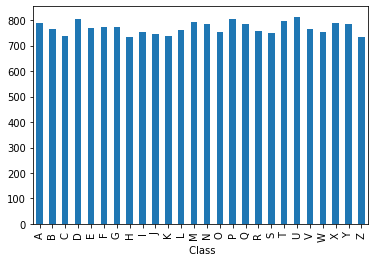

In [8]:
df.groupby([' Class'])[' Class'].count().plot(kind='bar')

A quantidade de ocorrências de cada letra é parecida e desta forma, não deve tendenciar o resultado do modelo.

Vamos utilizar o label encoder para transformar a representação das letras em números, e assim, podermos observar a correlação dos atributos com a classe. 

In [9]:
df2 = df.copy()
df2 = df2.sort_values(by=[' Class'], ascending=True)
df2.head()

,X-box,Y-box,Width,High,Onpix,X-bar,Y-bar,X2bar,Y2bar,Xybar,X2ybr,Xy2br,X-ege,Xegvy,Y-ege,Yegvx,Class
1778,1,3,2,1,1,7,2,2,1,7,2,8,1,6,1,7,A
15168,3,8,5,5,2,7,4,3,1,7,1,8,3,7,2,8,A
3339,3,5,6,6,2,8,3,3,2,7,1,8,3,6,3,8,A
8198,3,11,6,8,2,8,6,3,1,7,0,8,3,7,2,8,A
4758,4,7,6,5,3,9,3,2,2,8,1,8,2,6,3,7,A


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df2[' Class'])
print(le.classes_)
df2[' Class'] = le.transform(df2[' Class'])
df2.head()

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


,X-box,Y-box,Width,High,Onpix,X-bar,Y-bar,X2bar,Y2bar,Xybar,X2ybr,Xy2br,X-ege,Xegvy,Y-ege,Yegvx,Class
1778,1,3,2,1,1,7,2,2,1,7,2,8,1,6,1,7,0
15168,3,8,5,5,2,7,4,3,1,7,1,8,3,7,2,8,0
3339,3,5,6,6,2,8,3,3,2,7,1,8,3,6,3,8,0
8198,3,11,6,8,2,8,6,3,1,7,0,8,3,7,2,8,0
4758,4,7,6,5,3,9,3,2,2,8,1,8,2,6,3,7,0


## Matriz de Correlação

O coeficiente de correlação entre duas variáveis assume um valor entre -1 (correlação negativa perfeita) e 1 (correlação positiva perfeita). Valores próximos a 0 indicam a ausência de correlação entre as variáveis.

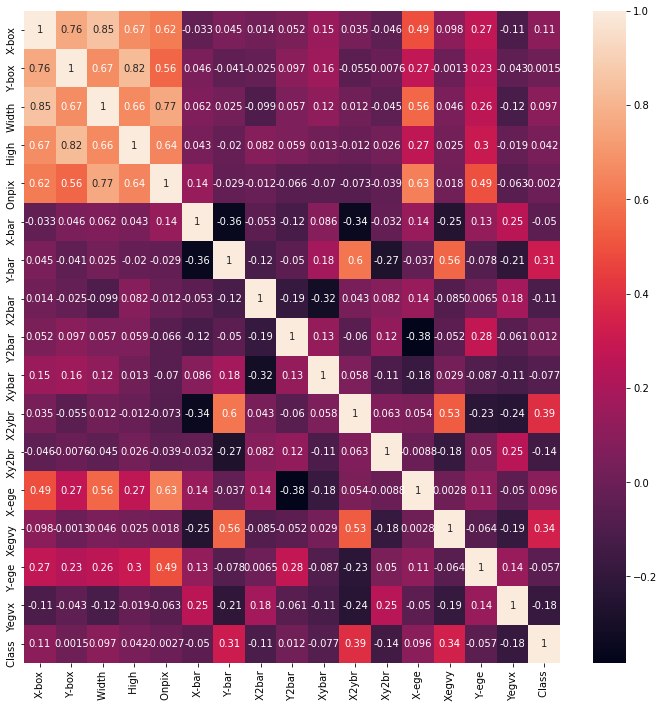

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df2.corr().round(4), annot=True)
plt.show()

Analisando a correlação da classe com os demais atributos, percebemos que as maiores correlações são Y-bar (0.31), X2ybr (0.39) e Xegvy (0.34). 

## Boxplot
O boxplot é um gráfico que nos permite ver a distribuição de uma determinada variável e visualizar se há presença de outliers.

O primeiro traço do retângulo representa 25%, o traço do meio representa a mediana (50%) e o traço superior 75%. Os valores representados por símbolos fora da linha ligada ao quadrado são os outliers.

Para que a distribuição seja considerada normal, os quadrados divididos pela mediana precisam ser o mais parecidos possível, caso contrário, a distribuição será assimétrica.

In [12]:
df2.columns

Index(['X-box', ' Y-box', ' Width', ' High', ' Onpix', ' X-bar', ' Y-bar',
       ' X2bar', ' Y2bar', ' Xybar', ' X2ybr', ' Xy2br', ' X-ege', ' Xegvy',
       ' Y-ege', ' Yegvx', ' Class'],
      dtype='object')

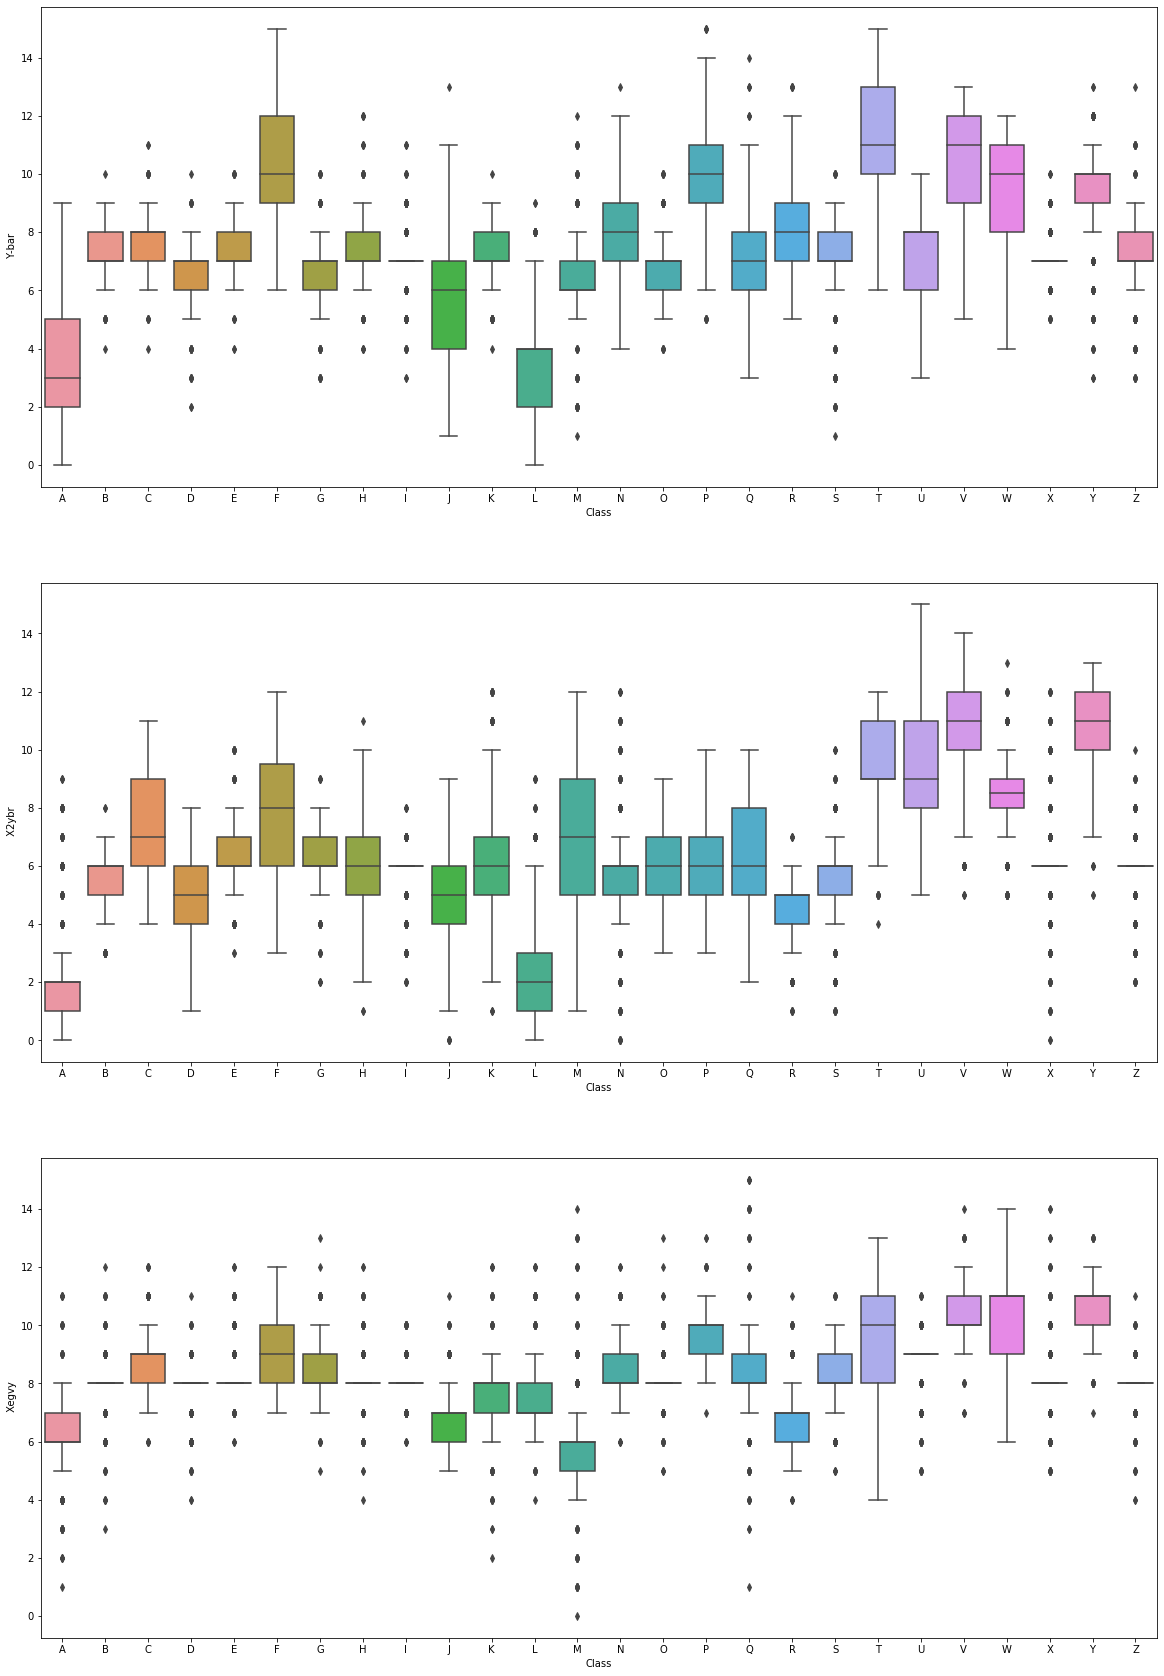

In [13]:
vars = [' Y-bar',' X2ybr',' Xegvy']

plt.figure(figsize=(20,30))
for v in range(len(vars)):
  plt.subplot(3,1,v+1)
  sns.boxplot(y=vars[v],x=' Class', data=df, order=le.classes_)
  plt.ylabel(vars[v])
  plt.xlabel('Class')
plt.show()

A distribuição das features para cada letra é bem diferente e a maioria contém outliers. 

Agora, vamos analisar a feature de menor correlação: Y-box (0.0015)

Text(0.5, 0, 'Class')

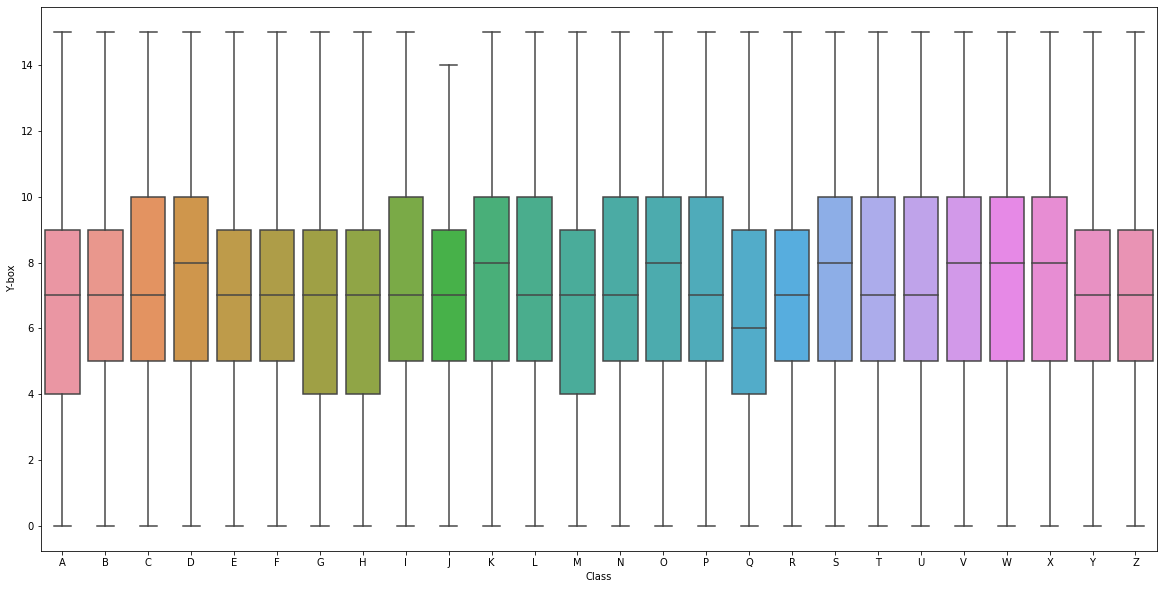

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(y=' Y-box',x=' Class', data=df, order=le.classes_)
plt.ylabel(' Y-box')
plt.xlabel('Class')

Para a feature Y-box já podemos perceber que a distribuição para as diferentes letras já é mais parecida. 

## Pairplot

Agora vamos observar a relação entre classe e as demais features por meio do gráfico de dispersão. Lembrando que o df2 é uma cópia do df porém com as letras representadas por números, sendo A:0 e Z:25.

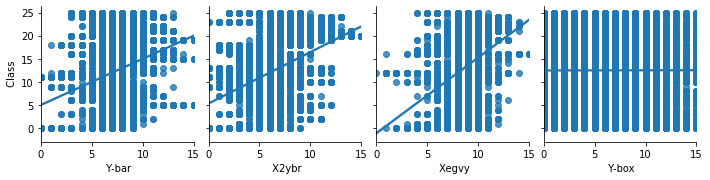

In [15]:
x_vars = vars
x_vars.append(' Y-box')
sns.pairplot(df2, y_vars=' Class', x_vars=x_vars, kind='reg')

Na figura acima podemos ver graficamente a dispersão entre a classe e as demais variáveis e, consequentemente, a correlação encontrada anteriormente no heatmap. A linha inclinada positivamente indica a existência de uma correlação positiva entre as variáveis e a linha horizontal indica a ausência de correlação. 

## Divisão do conjunto de dados

In [16]:
X = df[df.columns[:-1]]
y = df[' Class']

# **Aplicação dos modelos**
Para cada modelo, será feito o teste com e sem normalização da base de dados (preprocessing.StandardScaler).

### **Otimização dos hiperparâmetros do modelo**
Para a otimização dos hiperparâmetros do modelo foi utilizado o 'gp_minimize' da biblioteca 'skopt'. O parâmetro n_calls indica que essa otimização será executada 30 vezes (n_calls=30), sendo 10 vezes randômicas (n_random_starts=10) e as restantes utilizam o conhecimento adquirido nas 10 iterações iniciais. O retorno recebe o sinal negativo, pois como é uma função de minimização ela irá nos retornar o valor de maior score.


Na otimização será considerado apenas um conjunto de treinamento e teste, não sendo utilizado o k-fold.

### **Definição dos modelos treinados sem a normalização da base de dados**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [18]:
!pip install scikit-optimize
from skopt import gp_minimize

In [19]:
from sklearn.metrics import accuracy_score

### ExtraTreeClassifier
Classificador de árvore extremamente aleatório.

In [20]:
def train_ExtraTree(params):
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    
    model = ExtraTreeClassifier(
        splitter='best',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return -accuracy_score(y_test,pred)

In [21]:
params = [
          (2,100),
          (2,100),
          (1,100)
]

res = gp_minimize(train_ExtraTree, params, random_state=42, verbose=1, n_calls=30, n_random_starts=10)
res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0662
Function value obtained: -0.5908
Current minimum: -0.5908
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0742
Function value obtained: -0.7330
Current minimum: -0.7330
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0743
Function value obtained: -0.7302
Current minimum: -0.7330
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0667
Function value obtained: -0.6006
Current minimum: -0.7330
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0657
Function value obtained: -0.5508
Current minimum: -0.7330
Iteration No: 6 started. 

[100, 2, 1]

In [22]:
et1 = ExtraTreeClassifier(
        splitter='best',
        max_depth=29,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
)

## BaggingClassifier

In [23]:
def train_Bagging(params):
    n_estimators = params[0]
    max_features = params[1]
    
    model = BaggingClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return -accuracy_score(y_test,pred)

In [24]:
params = [
          (10,100),
          (1,16)
]

res = gp_minimize(train_Bagging, params, random_state=42, verbose=1, n_calls=30, n_random_starts=10)
res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.6840
Function value obtained: -0.9060
Current minimum: -0.9060
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.8347
Function value obtained: -0.9612
Current minimum: -0.9612
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4497
Function value obtained: -0.7540
Current minimum: -0.9612
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.6423
Function value obtained: -0.9426
Current minimum: -0.9612
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.1974
Function value obtained: -0.9468
Current minimum: -0.9612
Iteration No: 6 started. 

[100, 10]

In [25]:
bg1 = BaggingClassifier(
        n_estimators=100,
        max_features=9,
        random_state=42
)

### **Definição dos modelos treinados com a normalização da base de dados**

In [26]:
X2 = X.copy()
y2 = y.copy()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.25, random_state=42)

### ExtraTreeClassifier

In [29]:
def train_ExtraTree2(params):
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    
    model = ExtraTreeClassifier(
        splitter='best',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    model.fit(X_train2,y_train2)
    pred = model.predict(X_test2)
    return -accuracy_score(y_test2,pred)

In [30]:
params = [
          (2,100),
          (2,100),
          (1,100)
]

res = gp_minimize(train_ExtraTree2, params, random_state=42, verbose=1, n_calls=30, n_random_starts=10)
res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0621
Function value obtained: -0.5908
Current minimum: -0.5908
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0679
Function value obtained: -0.7330
Current minimum: -0.7330
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0672
Function value obtained: -0.7302
Current minimum: -0.7330
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0641
Function value obtained: -0.6006
Current minimum: -0.7330
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0617
Function value obtained: -0.5508
Current minimum: -0.7330
Iteration No: 6 started. 

[26, 2, 1]

In [31]:
et2 = ExtraTreeClassifier(
        splitter='best',
        max_depth=79,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
)

### BaggingClassifier

In [32]:
def train_Bagging2(params):
    n_estimators = params[0]
    max_features = params[1]
    
    model = BaggingClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train2,y_train2)
    pred = model.predict(X_test2)
    return -accuracy_score(y_test2,pred)

In [33]:
params = [
          (10,100),
          (1,16)
]

res = gp_minimize(train_Bagging2, params, random_state=42, verbose=1, n_calls=30, n_random_starts=10)
res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.8885
Function value obtained: -0.9064
Current minimum: -0.9064
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.2881
Function value obtained: -0.9622
Current minimum: -0.9622
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5343
Function value obtained: -0.7540
Current minimum: -0.9622
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.9394
Function value obtained: -0.9406
Current minimum: -0.9622
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.2522
Function value obtained: -0.9480
Current minimum: -0.9622
Iteration No: 6 started. 

[100, 9]

In [34]:
bg2 = BaggingClassifier(
        n_estimators=100,
        max_features=10,
        random_state=42
)

## Avaliação dos modelos

Temos 4 modelos de aprendizado de máquina supervisionados classificador inicializados, sendo eles:

**et1**: ExtraTreeClassifier sem normalização dos dados </br>
**et2**: ExtraTreeClassifier com normalização dos dados </br>
</br>

**bg1**: BaggingClassifier sem normalização dos dados </br>
**bg2**: BaggingClassifier com normalização dos dados



In [35]:
models1 = [et1, bg1]
models2 = [et2, bg2]

In [36]:
from sklearn.model_selection import cross_validate

cv_results1 = []
cv_results2 = []

for model in models1:
  cv_results1.append(cross_validate(model,X,y,cv=10,scoring=['accuracy','recall_macro','precision_macro']))

for model in models2:
  cv_results2.append(cross_validate(model,X2,y2,cv=10,scoring=['accuracy','recall_macro','precision_macro']))

In [37]:
cv_results1[0].keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall_macro', 'test_precision_macro'])

In [38]:
modelos = ['ExtraTreeClassifier1','BaggingClassifier1','ExtraTreeClassifier2','BaggingClassifier2']
acc_mean = [
            cv_results1[0]['test_accuracy'].mean(), 
            cv_results1[1]['test_accuracy'].mean(),
            cv_results2[0]['test_accuracy'].mean(),
            cv_results2[1]['test_accuracy'].mean()]
recall_mean = [
               cv_results1[0]['test_recall_macro'].mean(),
               cv_results1[1]['test_recall_macro'].mean(),
               cv_results2[0]['test_recall_macro'].mean(),
               cv_results2[1]['test_recall_macro'].mean()
]
precision_mean = [
                  cv_results1[0]['test_precision_macro'].mean(),
                  cv_results1[1]['test_precision_macro'].mean(),
                  cv_results2[0]['test_precision_macro'].mean(),
                  cv_results2[1]['test_precision_macro'].mean()
]

results = pd.DataFrame()
results['modelo'] = modelos
results['acc_mean'] = acc_mean
results['recall_mean'] = recall_mean
results['precision_mean'] = precision_mean

In [39]:
results

,modelo,acc_mean,recall_mean,precision_mean
0,ExtraTreeClassifier1,0.8566,0.856226,0.858058
1,BaggingClassifier1,0.9668,0.966552,0.967447
2,ExtraTreeClassifier2,0.8577,0.857306,0.858936
3,BaggingClassifier2,0.9673,0.967044,0.968018


Considerando a tabela de resultados acima, as melhores métricas são obtidas pelo modelo **BaggingClassifier** sem normalização dos dados, sendo a accuracy 0.96630, recall 0.966023 e precision 0.966964.

### Classification report


In [40]:
from sklearn.metrics import classification_report

for model in models1:
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  print(model)
  print(classification_report(y_test, pred))
  print('===============================================')

for model in models2:
  model.fit(X_train2,y_train2)
  pred = model.predict(X_test2)
  print(model)
  print(classification_report(y_test2, pred))
  print('===============================================')

ExtraTreeClassifier(max_depth=29, random_state=42, splitter='best')
              precision    recall  f1-score   support

           A       0.89      0.91      0.90       195
           B       0.74      0.75      0.74       186
           C       0.85      0.87      0.86       182
           D       0.79      0.80      0.79       215
           E       0.86      0.86      0.86       193
           F       0.83      0.85      0.84       198
           G       0.79      0.79      0.79       190
           H       0.73      0.78      0.75       187
           I       0.90      0.87      0.89       203
           J       0.87      0.87      0.87       173
           K       0.81      0.81      0.81       177
           L       0.88      0.92      0.90       209
           M       0.93      0.91      0.92       199
           N       0.87      0.84      0.85       188
           O       0.80      0.80      0.80       193
           P       0.87      0.90      0.88       202
           Q 

### Matriz de Confusão

Matriz de confusão com a melhor técnica selecionada: BaggingClassifier 1 (sem normalização nos dados)

In [41]:
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

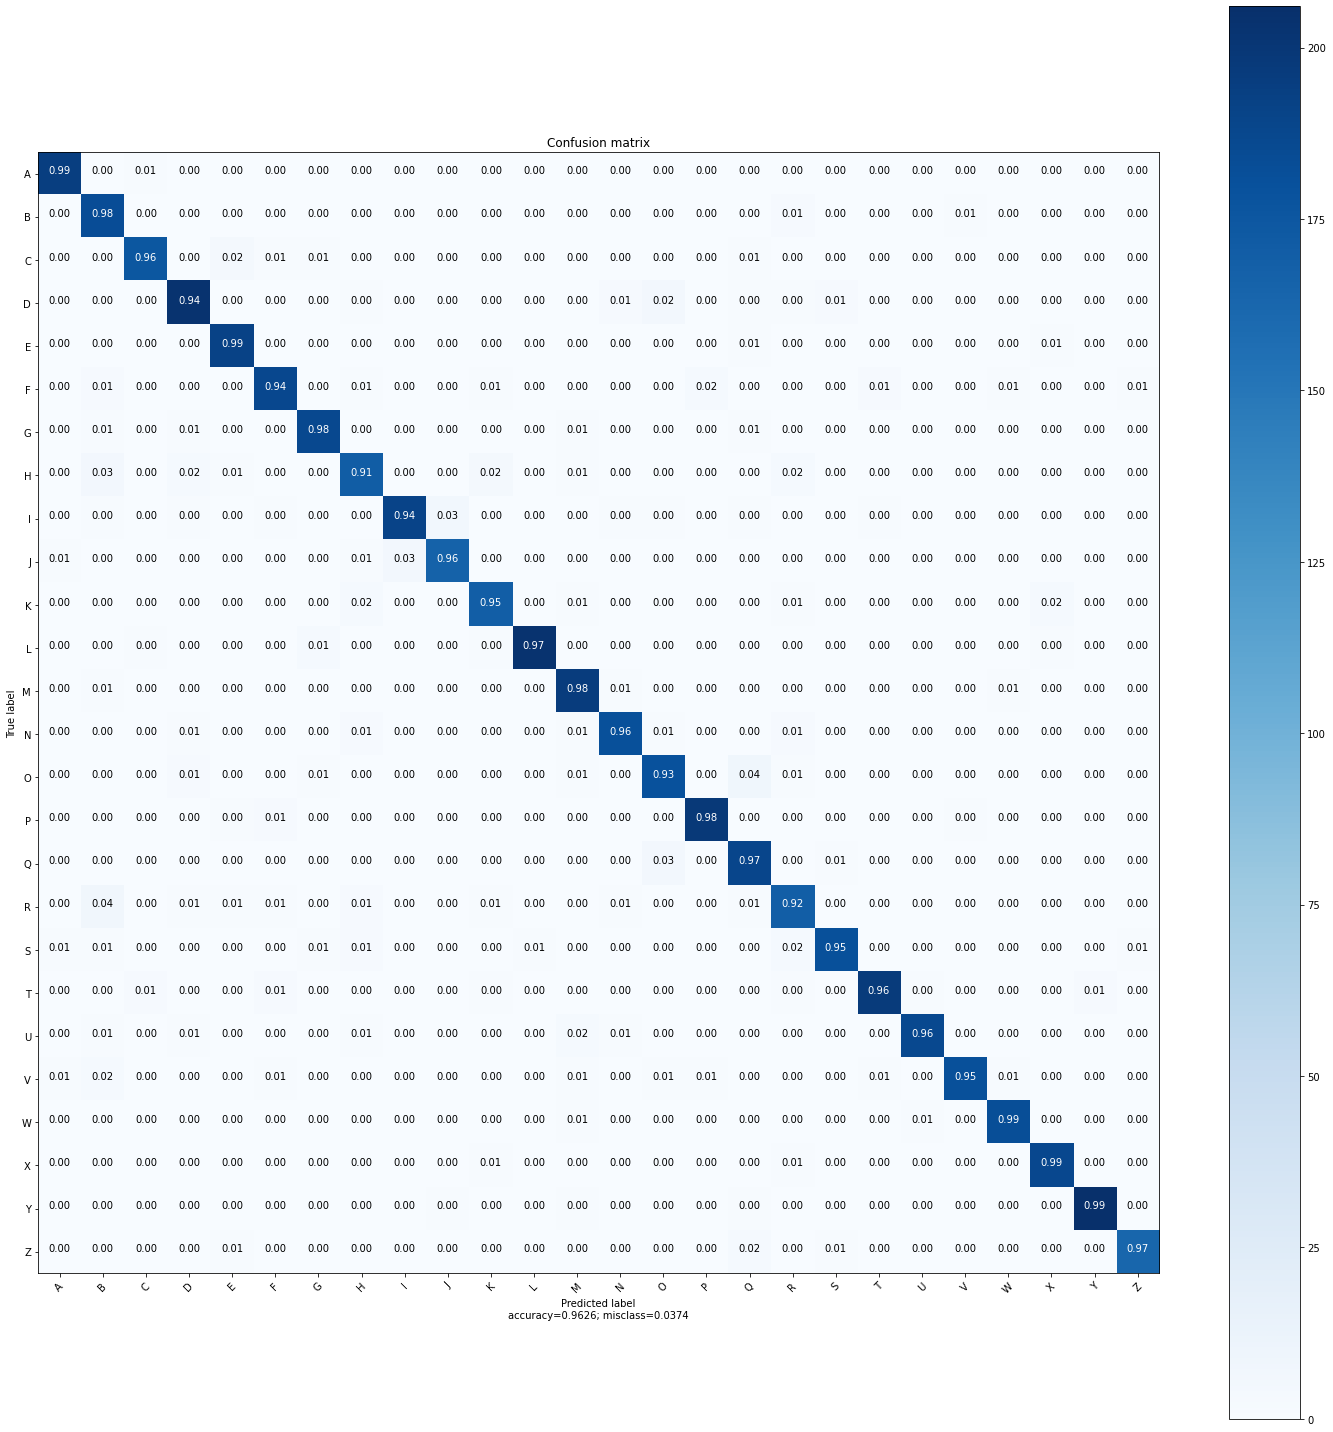

In [42]:
from sklearn.metrics import confusion_matrix
bg1.fit(X_train,y_train)
pred = bg1.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,pred), le.classes_ )

De acordo com a matriz de confusão, a letra com menos acertos foi H (90%), sendo confundida na maioria das vezes com K (4%) e R (3%). O erro entre essas classes se dá possivelmente pela semelhança da escrita dessas letras em alguns tipos de fontes.

As letras com maiores acertos (99%) foram A, B, M, X e Y. 

De modo geral, o desempenho do modelo foi bom, acertando mais de 90% de todas as letras. 

# Considerações Finais

In [43]:
bg1

BaggingClassifier(max_features=9, n_estimators=100, random_state=42)

In [44]:
results

,modelo,acc_mean,recall_mean,precision_mean
0,ExtraTreeClassifier1,0.8566,0.856226,0.858058
1,BaggingClassifier1,0.9668,0.966552,0.967447
2,ExtraTreeClassifier2,0.8577,0.857306,0.858936
3,BaggingClassifier2,0.9673,0.967044,0.968018


Considerando todas as métricas avaliadas, o modelo de melhor desempenho foi o BaggingClassifier sem normalização nos dados. Ele foi iniciado com os valores diferentes do padrão da classe, sendo max_features=9 (padrão=1) e n_estimators=100 (padrão=10). O resultado dos modelos BaggingClassifier com e sem normalização apresentam desempenho muito semelhante, sendo o sem normalização um pouco melhor. 

Por outro lado, comparando o BaggingClassifier com o ExtraTreeClassifier nota-se uma diferença nas métricas de aproximadamente 10%, sendo que para algumas letras o ExtraTreeClassifier possui f1 inferior a 80%. Um exemplo é a letra R que os modelos de BaggingClassifier possuem um f1 de aproximadamente 91% e o ExtraTreeClassifier de aproximadamente 72%. Essa grande diferença também acontece para diversas outras letras, o que faz com que o BaggingClassifier seja o modelo de melhor desempenho.   

A tabela results mostrada acima mostra os valores médios das métricas obtidas por meio do treinamento via validação cruzada com 10 camadas. 

De acordo com a tabela fornecida para comparação, o valor de referência para o ExtraTreeClassifier é 0.750 e para o BaggingClassifier é 0.917. Em todos os modelos instanciados, a acurácia é superior a da tabela.





**As considerações finais foram escritas conforme enunciado do trabalho proposto na disciplina.**